<a href="https://colab.research.google.com/github/MarLen611/bank-defaults-in-russia/blob/main/eda_bank_customer_churn_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA | Анализ оттока клиентов банка

Рассмотрим набор данных "Bank Customer Churn", проанализируем отток клиентов, в том числе с использованием методов визуализации данных (boxplot, heatmap, scatter plot matrix)

В блокноте описаны следующие ключевые этапы:

Загрузка и исследование данных: Этап загрузки предполагает получение набора данных и изучение его свойств, таких как структура, типы объектов и наличие пропущенных значений.

Далее следует процесс исследовательского анализа данных (EDA), в рамках которого проводится глубокий анализ набора данных. Включает в себя визуализации и статистические сводки, которые помогают получить представление о распределении данных и взаимосвязях между переменными.

В блокноте будут представлены фрагменты кода, графические представления данных, пояснения и рекомендации, относительно проведенного анализа.

Источник и описание набора данных: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn?resource=download



In [ ]:
# Загружаем необходимые библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Загружаем данные из csv-таблицы в переменную df:
df = pd.read_csv('Customer-Churn-Records.csv', sep = ',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Подготовка данных

In [ ]:
# Видим, что пропуски в данных отсутствуют, тип данных не требует изменений
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
# Проверим данные на уникальность
df['CustomerId'].nunique()

10000

## EDA

<ipython-input-36-c4738f951e49>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot=True, cbar= True, cmap='rainbow')


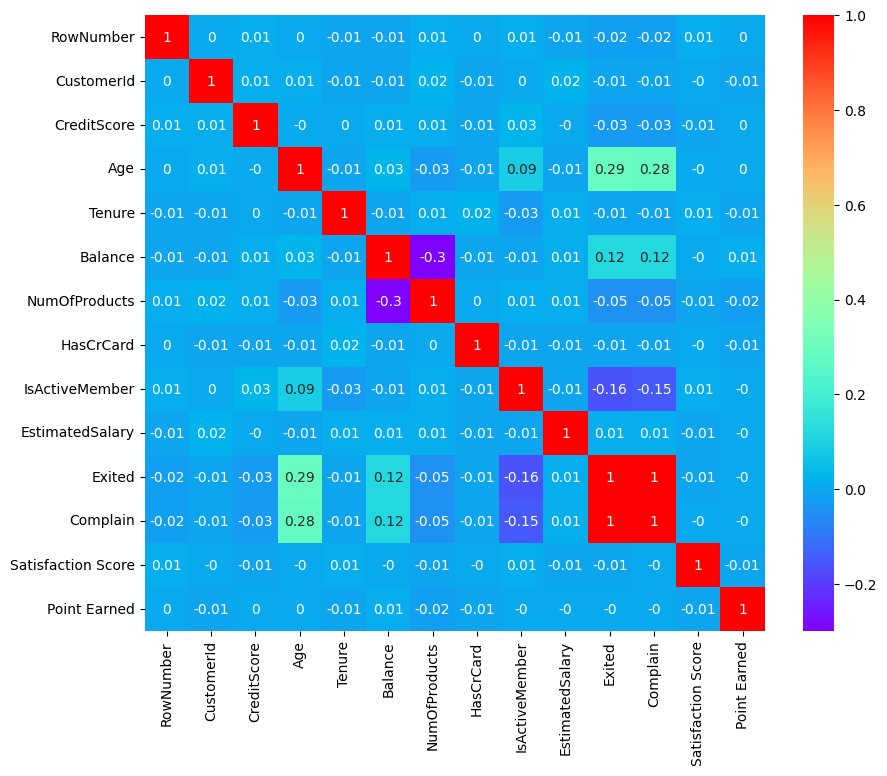

In [ ]:
# Построим матрицу корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().round(2), annot=True, cbar= True, cmap='rainbow')
plt.show()

Исходя из данных, можно сделать следующие выводы:

1. Коэффициент корреляции между переменными 'Exited' (отток клиентов) и 'Complain' (жалобы клиентов) равен 1. Это говорит о тесной положительной связи между этими двумя переменными. То есть, клиенты, которые жалуются, имеют большую вероятность покинуть банк.

2. Коэффициент корреляции между переменными 'Exited' и 'Age' равен 0.29. Это свидетельствует о слабой положительной связи между возрастом клиента и его склонностью к оттоку.

3. Коэффициент корреляции между переменными 'Exited' и 'Balance' равен 0.12. Это говорит о очень слабой положительной связи между балансом счета клиента и его склонностью к оттоку. То есть, клиенты с более высоким балансом имеют незначительно большую вероятность покинуть банк.

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
# Рассмотрим столбец "Exited" описывающий отток клиентов, где 0 - действующие клиенты,
# а 1 - те, кто отказался от услуг банка.
df['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [ ]:
# Сгруппируем данные по "Exited" в новые переменные
no_churn = df.loc[df['Exited'] == 0]
churn = df.loc[df['Exited'] == 1]

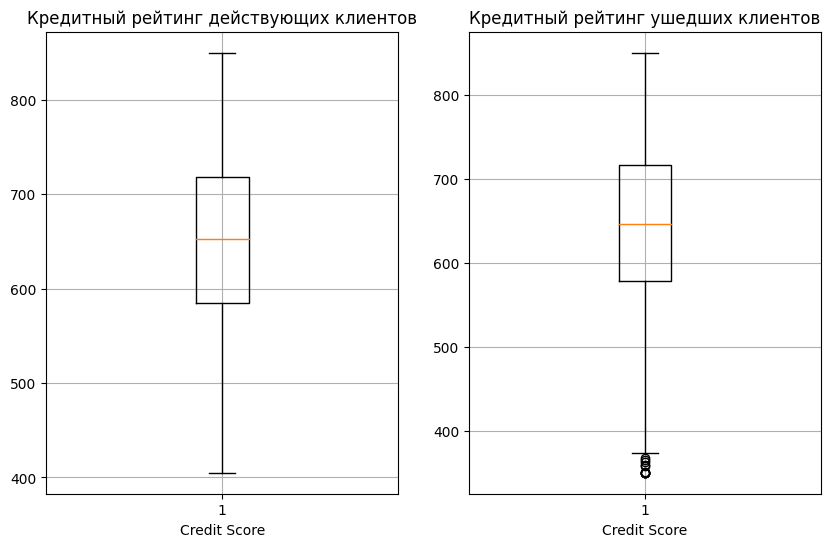

In [ ]:
# Рассмотрим кредитный рейтинг для каждой группы клиентов отдельно на диаграмме разброса
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(no_churn['CreditScore'])
plt.title('Кредитный рейтинг действующих клиентов')
plt.xlabel('Credit Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.boxplot(churn['CreditScore'])
plt.title('Кредитный рейтинг ушедших клиентов')
plt.xlabel('Credit Score')
plt.grid(True)

plt.show()

In [ ]:
# Расчёт среднего значения, медианы, максимума и минимума кредитоного рейтинга для действующих клиентов
mean_credit_score = no_churn['CreditScore'].mean()
median_credit_score = no_churn['CreditScore'].median()
max_credit_score = no_churn['CreditScore'].max()
min_credit_score = no_churn['CreditScore'].min()
print(f'Среднее значение: {mean_credit_score}\nМедиана: {median_credit_score}\nМаксимум: {max_credit_score}\nМинимум: {min_credit_score}')

Среднее значение: 651.8378548103492
Медиана: 653.0
Максимум: 850
Минимум: 405


In [ ]:
# Расчёт среднего значения, медианы, максимума и минимума кредитоного рейтинга для ушедщих из банка клиентов
mean_credit_score_1 = churn['CreditScore'].mean()
median_credit_score_1 = churn['CreditScore'].median()
max_credit_score_1 = churn['CreditScore'].max()
min_credit_score_1 = churn['CreditScore'].min()
print(f'Среднее значение: {mean_credit_score_1}\nМедиана: {median_credit_score_1}\nМаксимум: {max_credit_score_1}\nМинимум: {min_credit_score_1}')

Среднее значение: 645.4146221786065
Медиана: 646.0
Максимум: 850
Минимум: 350


На диаграмме разброса можно отметить, что только у клиентов покинувших банк, встречается кредитный
рейтинг ниже 400.

В остальном, значения медианы, максимума и минимума будут примерно равны между двумя группами.


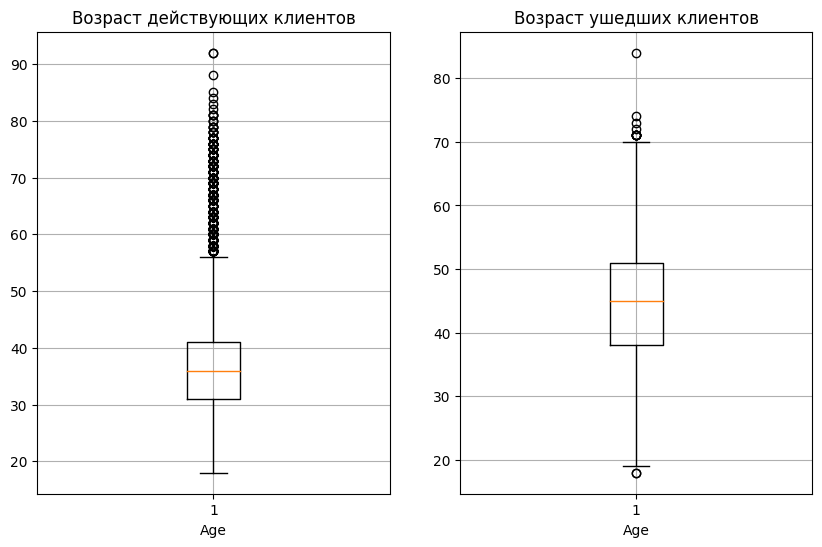

In [ ]:
# Рассмотрим на диаграмме разброса распределение возраста клиентов в каждой группе отдельно

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(no_churn['Age'])
plt.title('Возраст действующих клиентов')
plt.xlabel('Age')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.boxplot(churn['Age'])
plt.title('Возраст ушедших клиентов')
plt.xlabel('Age')
plt.grid(True)

plt.show()

In [ ]:
# Расчёт среднего значения, медианы, максимума и минимума возраста для действующих клиентов
mean_age = no_churn['Age'].mean()
median_age = no_churn['Age'].median()
max_age = no_churn['Age'].max()
min_age = no_churn['Age'].min()
print(f'Среднее значение: {mean_age}\nМедиана: {median_age}\nМаксимум: {max_age}\nМинимум: {min_age}')

Среднее значение: 37.40806330067822
Медиана: 36.0
Максимум: 92
Минимум: 18


In [ ]:
# Расчёт среднего значения, медианы, максимума и минимума возраста для ушедщих из банка клиентов
mean_age_1 = churn['Age'].mean()
median_age_1 = churn['Age'].median()
max_age_1 = churn['Age'].max()
min_age_1 = churn['Age'].min()
print(f'Среднее значение: {mean_age_1}\nМедиана: {median_age_1}\nМаксимум: {max_age_1}\nМинимум: {min_age_1}')

Среднее значение: 44.83562315996075
Медиана: 45.0
Максимум: 84
Минимум: 18


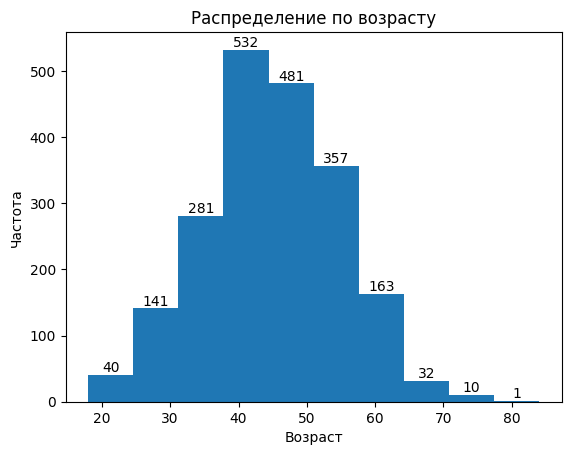

In [ ]:
# Создадим гистограмму
n, bins, patches = plt.hist(churn['Age'], bins=10)

# Добавьте подписи к осям и заголовок
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение по возрасту')

# Покажите значения на пиках столбцов
for i in range(len(patches)):
    if patches[i].get_height() > 0:
        plt.text(patches[i].get_x() + patches[i].get_width() / 2,  # x координата текста
                 patches[i].get_height(),  # y координата текста (высота столбца)
                 str(int(n[i])),  # текст (количество клиентов)
                 ha='center',  # выравнивание текста по горизонтали
                 va='bottom')  # выравнивание текста по вертикали

# Покажите график
plt.show()

Наибольшая частота оттока, что указывает на то, что возраст 40-50 лет является наиболее распространенным среди клиентов, покинувших банк.

Гистограмма позволяет увидеть, как возраст распределен среди клиентов, покинувших банк. Клиенты возрастных групп от 18 до 25 лет, а также от 60 до 90 реже остальных покидают банк. Гистограмма имеет ярко выраженный пик при возрасте от 40 до 50 лет, это может указывать на какую-то закономерность или особенность в этой возрастной группе.

Это может подтвердить или подразумевать, что услуги банка не соответствуют ожиданиям клиентов данного возраста.

In [ ]:
# Посмотрим на зависимость оттока клиентов от местоположения
geography_counts = df[['Geography', 'Exited']].groupby('Geography').count()
geography_counts.columns = ['TotalCustomers']

# Считаем процент клиентов в каждой стране от общего числа клиентов
geography_counts['PercentageOfTotal'] = (geography_counts['TotalCustomers'] / geography_counts['TotalCustomers'].sum()) * 100

# Выводим полученную таблицу
Geography = geography_counts.reset_index()
Geography

,Geography,TotalCustomers,PercentageOfTotal
0,France,5014,50.14
1,Germany,2509,25.09
2,Spain,2477,24.77


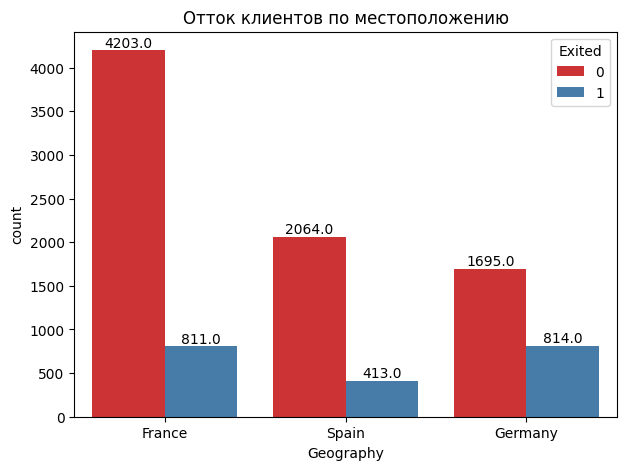

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Geography', hue='Exited', data=df, palette='Set1')

# Добавление текстовых меток к каждому столбцу
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Проверка, что столбец не пустой
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha='center', va='bottom')

plt.title('Отток клиентов по местоположению')
plt.show()

Распределение клиентов по странам:

Половина всех клиентов сосредоточена во Франции, что указывает на доминирование этой страны среди клиентской базы.

Отток клиентов:

Испания имеет самый низкий отток клиентов - 413 человек, что составляет 20.01% от общего числа клиентов в Испании. Это может говорить о более стабильной клиентской базе в этой стране.

Отток во Франции и Германии:

Во Франции и Германии отток клиентов примерно одинаковый по количеству (811 и 814 соответственно). Однако, при анализе в процентном соотношении к общему числу клиентов в стране, видно, что отток во Франции составляет 19.3%, тогда как в Германии - 48.02%.
Это говорит о том, что отток клиентов в Германии, хотя и меньше по абсолютным значениям, в процентном отношении более значителен, что может быть вызвано разными факторами, такими как конкурентная среда или клиентские предпочтения.

In [ ]:
# Посмотрим на зависимость оттока клиентов от типа используемой карты

Card_Type = df[['Card Type', 'Exited']].groupby('Card Type').count()
Card_Type

,Exited
Card Type,
DIAMOND,2507
GOLD,2502
PLATINUM,2495
SILVER,2496


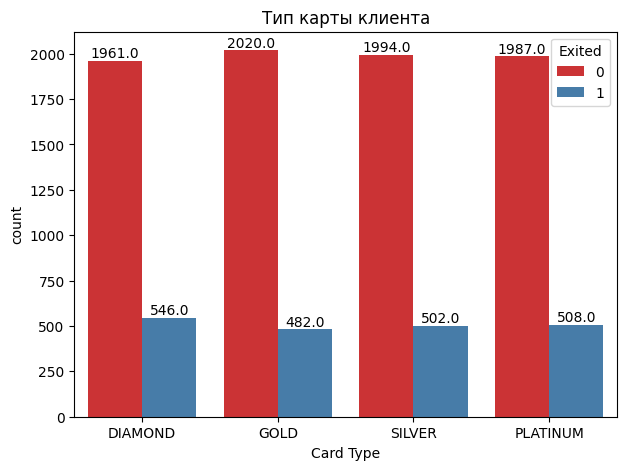

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Card Type', hue='Exited', data = df, palette = 'Set1')

# Добавление текстовых меток к каждому столбцу
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Проверка, что столбец не пустой
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha='center', va='bottom')

plt.title('Тип карты клиента')
plt.show()

Видим равномерное распределение пользователей для каждого типа карты, как среди действующих клиентов, так и среди ушедших, явной взаимосвязи нет.

In [ ]:
# Сравним активность клиентов в двух группах
IsActiveMember = df[['IsActiveMember', 'Exited']].groupby('IsActiveMember').count()
IsActiveMember

,Exited
IsActiveMember,
0,4849
1,5151


In [ ]:
# Посмотрим влияние на отток количества продуктов банка у клиента
NumOfProducts = df[['NumOfProducts', 'Exited']].groupby('NumOfProducts').count()
NumOfProducts

,Exited
NumOfProducts,
1,5084
2,4590
3,266
4,60


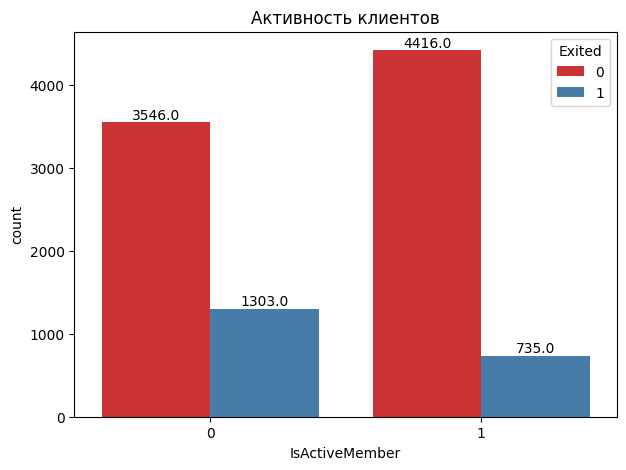

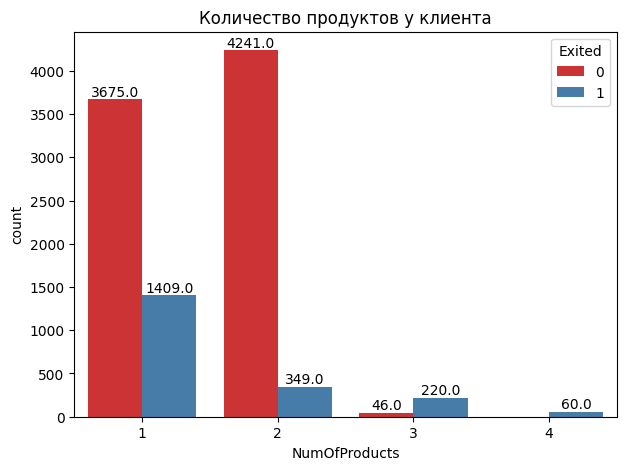

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='IsActiveMember', hue='Exited', data = df, palette = 'Set1')
# Добавление текстовых меток к каждому столбцу
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Проверка, что столбец не пустой
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha='center', va='bottom')
plt.title('Активность клиентов')
plt.show()

plt.figure(figsize=(7, 5))
bx = sns.countplot(x='NumOfProducts', hue='Exited', data = df, palette = 'Set1')
# Добавление текстовых меток к каждому столбцу
for p in bx.patches:
    height = p.get_height()
    if height > 0:  # Проверка, что столбец не пустой
        bx.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha='center', va='bottom')
        plt.title('Активность клиентов')
plt.title('Количество продуктов у клиента')
plt.show()

Согласно гистограмме распределения количества продуктов у клиентов, можно сделать следующие выводы:

1) Большинство клиентов (5084) пользуются только одним продуктом банка. Среди этих клиентов, 3675 человек являются активными клиентами, а 1409 человек - это клиенты, которые ушли. Это говорит о том, что 27.71% клиентов, имеющих только один продукт, склонны к оттоку.

2) Далее, количество клиентов, использующих два продукта, составляет 4590. Среди них, 4241 человек являются активными клиентами, в то время как 349 человек покинули банк. Это указывает на более высокую лояльность клиентов, имеющих два продукта, по сравнению с теми, у кого только один продукт.

3) Только 266 клиентов используют три продукта, при этом только 46 человек из них являются активными клиентами. Это означает, что степень оттока клиентов, использующих три продукта, очень высока, составляя 220 человек. Это является важным фактором, который требует внимания и анализа для разработки стратегий удержания таких клиентов.

4) Наконец, только 60 клиентов имеют четыре продукта банка, но все они покинули банк. Это говорит о том, что клиенты с четырьмя продуктами на данный момент не являются стабильной категорией клиентов.

На основе этих данных рекомендуется провести анализ причин оттока для клиентов с одним продуктом и клиентов с тремя продуктами. Это поможет идентифицировать возможные проблемы и разработать соответствующие меры для повышения лояльности и удержания клиентов. Кроме того, может быть целесообразно провести дополнительные исследования для привлечения новых клиентов и расширения их использования более чем одного продукта.

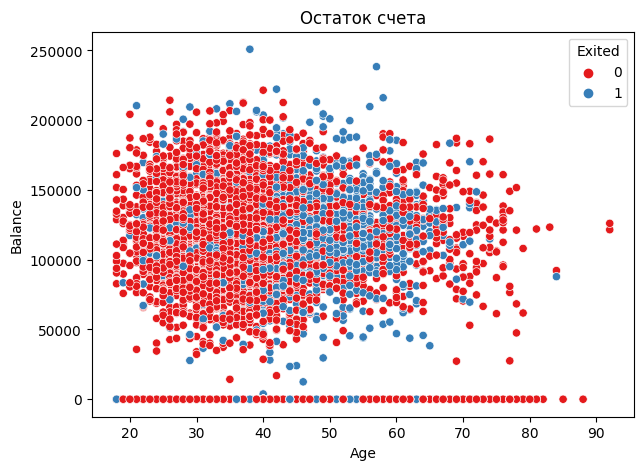

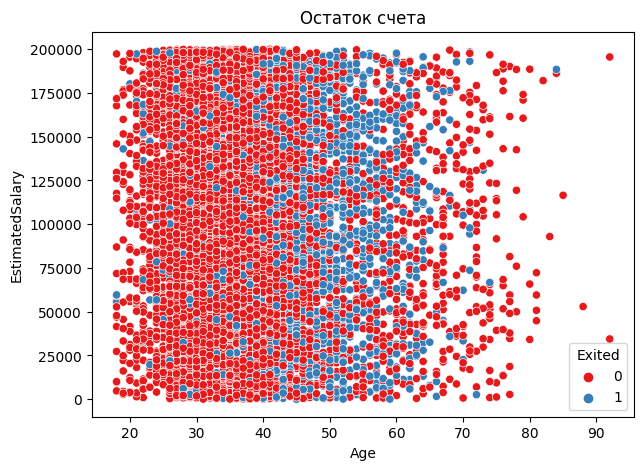

In [ ]:
# Рассмотрим взаимосвязь оттока клиентов с остатком на счете и ориентировочным уровнем заработной платы
# Клиенты сгруппированы по возрасту

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited', palette = 'Set1')
plt.title('Остаток счета')
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Exited', palette = 'Set1')
plt.title('Остаток счета')
plt.show()

Распределение остатков на счетах, как и размера предполагаемой заработной платы не показывает четкого различия между действующими и ушедшими клиентами. Взаимосвязь очень слабая, либо отсутствует.

In [ ]:
# Посчитаем базовые математические функции: сумму (sum), среднее значение (mean),
# медианное значение (median), минимум (minimum), максимум (maximum),
# стандартное отклонение (standard deviation) и дисперсию (variance)

agg_func_math = {
    'Balance': ['sum', 'mean', 'median', 'min', 'max', 'std', 'var']
}
df.groupby(['Exited']).agg(agg_func_math).round(2)

Balance                                                 \
                 sum      mean     median  min        max       std   
Exited                                                                
0       5.791778e+08  72742.75   92063.06  0.0  221532.80  62851.58   
1       1.856811e+08  91109.48  109344.23  0.0  250898.09  58346.48   

                      
                 var  
Exited                
0       3.950321e+09  
1       3.404312e+09

In [ ]:
agg_func_m = {
    'EstimatedSalary': ['sum', 'mean', 'median', 'min', 'max', 'std', 'var']
}
df.groupby(['Exited']).agg(agg_func_m).round(2)

EstimatedSalary                                                    \
                   sum       mean     median    min        max       std   
Exited                                                                     
0         7.940252e+08   99726.85   99620.36  90.07  199992.48  57399.96   
1         2.068772e+08  101509.91  102489.34  11.58  199808.10  57932.62   

                      
                 var  
Exited                
0       3.294755e+09  
1       3.356189e+09

## Выводы по результатам проведенного EDA

Итак, на основе анализа матрицы корреляции можно сделать вывод, что наибольшую связь с оттоком клиентов имеют жалобы клиентов и, в меньшей степени, возраст клиента. Баланс счета имеет слабую связь с оттоком.

В дальнейшем, для предотвращения оттока клиентов, банку следует обратить особое внимание на улучшение уровня обслуживания и решение проблем клиентов, а также принять меры по удержанию клиентов возрастной группы 40-50 лет.

Исходя из проведенного анализа распределения клиентов по странам и оттока клиентов, я обратила внимание на несколько важных аспектов, которые могут быть полезны для стратегии удержания клиентов.

Во-первых, стоит отметить, что половина всех клиентов находится во Франции, что указывает на значительное доминирование этой страны в клиентской базе. Это предоставляет отличные возможности для развития более глубоких отношений с клиентами и предоставления персонализированных услуг.

Во-вторых, стоит обратить внимание на отток клиентов. Испания продемонстрировала самый низкий отток среди всех стран, что может свидетельствовать о более стабильной клиентской базе в этой стране. Важно узнать причины этой стабильности и применить соответствующие стратегии и методы для сохранения лояльности клиентов.

Кроме того, стоит обратить внимание на сравнительный анализ оттока клиентов во Франции и Германии. Это может быть вызвано разными факторами, такими как конкурентная среда или клиентские предпочтения. Рекомендуется более детально изучить причины оттока клиентов в Германии и разработать целенаправленные меры для его снижения.

А так же, как упомяналось выше, рекомендуется провести анализ причин оттока для клиентов с одним продуктом и клиентов с тремя продуктами. Это поможет идентифицировать возможные проблемы и разработать соответствующие меры для повышения лояльности и удержания клиентов.
Кроме того, может быть целесообразно провести дополнительные исследования для привлечения новых клиентов и расширения их использования более чем одного продукта.